In [1257]:
import pandas as pd
import numpy as np
import tensorflow as tf

from matplotlib import pyplot as plt
import seaborn as sns

import category_encoders as ce

import math

from numpy import absolute

from numpy import loadtxt
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OrdinalEncoder

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso

In [452]:
pd.set_option('display.max_columns', None)

In [453]:
path = "E:/ITV training/housepricing/"

In [454]:
df = pd.read_csv(path + "train.csv")

In [241]:
df.head(11)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,GasA,Ex,

In [92]:
df_test = pd.read_csv(path + "test.csv")

# Data Exploration

In [93]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,NaN,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [24]:
# df_test.shape

In [25]:
# df_train.shape

In [26]:
# test_col = set(df_test.columns)
# train_col = set(df_train.columns)

# train_col - test_col

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [95]:
df.duplicated().sum()

0

In [96]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [32]:
df1 = df.copy()

##### Dropping the following columns:

Id
Alley
PoolQC
Fence
MiscFeature
MasVnrType

In [70]:
df1 = df[['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
        'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'SalePrice']]

In [38]:
df1.shape

(1460, 77)

In [51]:
df1.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [45]:
df1.describe().info()

<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, count to max
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             8 non-null      float64
 1   MSSubClass     8 non-null      float64
 2   LotFrontage    8 non-null      float64
 3   LotArea        8 non-null      float64
 4   OverallQual    8 non-null      float64
 5   OverallCond    8 non-null      float64
 6   YearBuilt      8 non-null      float64
 7   YearRemodAdd   8 non-null      float64
 8   MasVnrArea     8 non-null      float64
 9   BsmtFinSF1     8 non-null      float64
 10  BsmtFinSF2     8 non-null      float64
 11  BsmtUnfSF      8 non-null      float64
 12  TotalBsmtSF    8 non-null      float64
 13  1stFlrSF       8 non-null      float64
 14  2ndFlrSF       8 non-null      float64
 15  LowQualFinSF   8 non-null      float64
 16  GrLivArea      8 non-null      float64
 17  BsmtFullBath   8 non-null      float64
 18  BsmtHalfBath 

In [46]:
df1.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 77, dtype: int64

In [97]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Get continuous columns and categorical columns

In [215]:
cont_col = list(df1.describe().columns)

In [216]:
len(cont_col)

37

In [217]:
categ_col = list(set(df1.columns) - set(cont_col))

In [218]:
len(categ_col)

39

In [1277]:
df1

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,NaN,Attchd,1950.0,Unf,1,240,TA,TA,Y,366,0,112,0,0,0,0,4,2010,WD,Normal,142125


## Feature engineering

### Continuous columns

In [109]:
dfcont = df[cont_col]

#### Using correlation threshold of 0.5

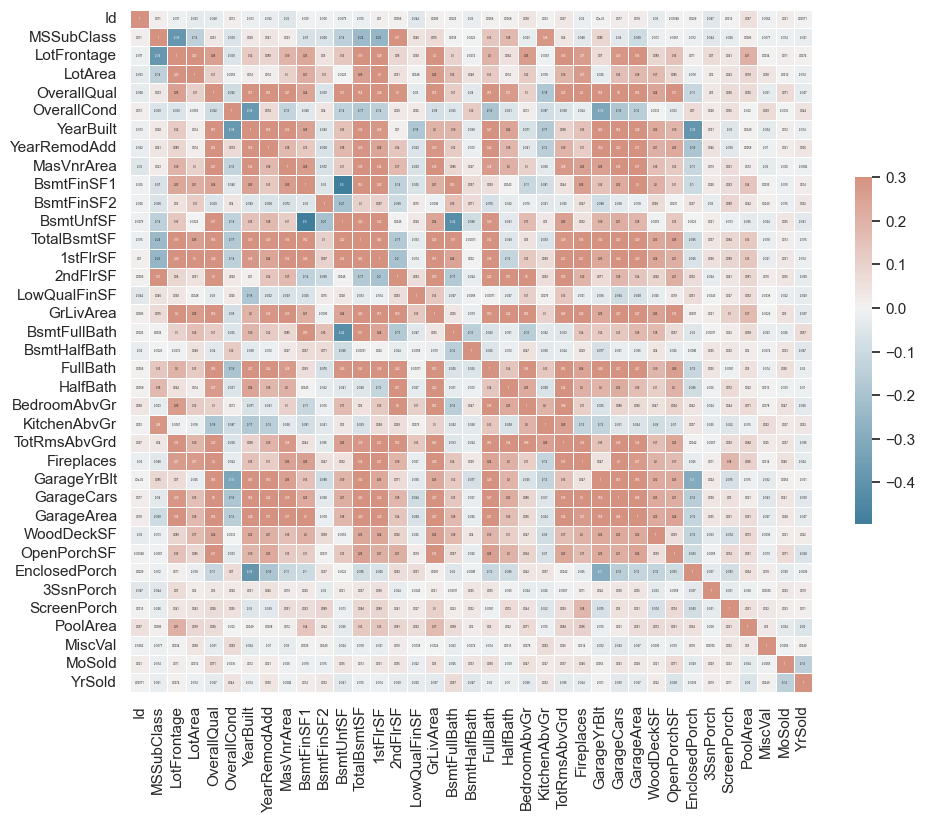

In [1282]:
sns.set_theme(style="white")

# Compute the correlation matrix
corr = dfcont.drop(columns='SalePrice').corr(method='pearson')

# # Generate a mask for the upper triangle
# mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr[co], cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, annot_kws = {'size': 2})

plt.savefig("corr_mat.png")

In [159]:
corr_5 = corr[corr>0.5]

In [179]:
corr_5

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
Id,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MSSubClass,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotFrontage,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotArea,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OverallQual,NaN,NaN,NaN,NaN,1.000000,NaN,0.572323,0.550684,NaN,NaN,NaN,NaN,0.537808,NaN,NaN,NaN,0.593007,NaN,NaN,0.550600,NaN,NaN,NaN,NaN,NaN,0.547766,0.600671,0.562022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OverallCond,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YearBuilt,NaN,NaN,NaN,NaN,0.572323,NaN,1.000000,0.592855,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.825667,0.537850,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YearRemodAdd,NaN,NaN,NaN,NaN,0.550684,NaN,0.592855,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.642277,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MasVnrArea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BsmtFinSF1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,0.522396,NaN,NaN,NaN,NaN,0.649212,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [181]:
corr_5 = corr_5[corr_5.sum(axis=0)>1]

In [184]:
corr_5

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
OverallQual,NaN,NaN,NaN,NaN,1.000000,NaN,0.572323,0.550684,NaN,NaN,NaN,NaN,0.537808,NaN,NaN,NaN,0.593007,NaN,NaN,0.550600,NaN,NaN,NaN,NaN,NaN,0.547766,0.600671,0.562022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YearBuilt,NaN,NaN,NaN,NaN,0.572323,NaN,1.000000,0.592855,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.825667,0.537850,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YearRemodAdd,NaN,NaN,NaN,NaN,0.550684,NaN,0.592855,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.642277,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BsmtFinSF1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,0.522396,NaN,NaN,NaN,NaN,0.649212,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TotalBsmtSF,NaN,NaN,NaN,NaN,0.537808,NaN,NaN,NaN,NaN,0.522396,NaN,NaN,1.000000,0.819530,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1stFlrSF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.819530,1.000000,NaN,NaN,0.566024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2ndFlrSF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,0.687501,NaN,NaN,NaN,0.609707,0.502901,NaN,0.616423,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GrLivArea,NaN,NaN,NaN,NaN,0.593007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.566024,0.687501,NaN,1.000000,NaN,NaN,0.630012,NaN,0.521270,NaN,0.825489,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BsmtFullBath,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.649212,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FullBath,NaN,NaN,NaN,NaN,0.550600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.630012,NaN,NaN,1.000000,NaN,NaN,NaN,0.554784,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [160]:
dfcont.corr()['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

In [183]:
for col in cont_col[:-1]:
    print(corr_5[col].sort_values(ascending=True)[:9])
    print('-------------------')

OverallQual    NaN
YearBuilt      NaN
YearRemodAdd   NaN
BsmtFinSF1     NaN
TotalBsmtSF    NaN
1stFlrSF       NaN
2ndFlrSF       NaN
GrLivArea      NaN
BsmtFullBath   NaN
Name: Id, dtype: float64
-------------------
OverallQual    NaN
YearBuilt      NaN
YearRemodAdd   NaN
BsmtFinSF1     NaN
TotalBsmtSF    NaN
1stFlrSF       NaN
2ndFlrSF       NaN
GrLivArea      NaN
BsmtFullBath   NaN
Name: MSSubClass, dtype: float64
-------------------
OverallQual    NaN
YearBuilt      NaN
YearRemodAdd   NaN
BsmtFinSF1     NaN
TotalBsmtSF    NaN
1stFlrSF       NaN
2ndFlrSF       NaN
GrLivArea      NaN
BsmtFullBath   NaN
Name: LotFrontage, dtype: float64
-------------------
OverallQual    NaN
YearBuilt      NaN
YearRemodAdd   NaN
BsmtFinSF1     NaN
TotalBsmtSF    NaN
1stFlrSF       NaN
2ndFlrSF       NaN
GrLivArea      NaN
BsmtFullBath   NaN
Name: LotArea, dtype: float64
-------------------
TotalBsmtSF     0.537808
GarageYrBlt     0.547766
FullBath        0.550600
YearRemodAdd    0.550684
GarageArea    

In [205]:
# corr = corr.set_index(corr.columns)
pairs = corr.where(np.triu(corr, k=1).astype(bool)).stack()
corr_feat = list(pairs[pairs.abs().gt(0.5)].index)

In [206]:
target_corr_feat = dfcont.corr()['SalePrice'].sort_values(ascending=False)

In [207]:
corr_feat

[('OverallQual', 'YearBuilt'),
 ('OverallQual', 'YearRemodAdd'),
 ('OverallQual', 'TotalBsmtSF'),
 ('OverallQual', 'GrLivArea'),
 ('OverallQual', 'FullBath'),
 ('OverallQual', 'GarageYrBlt'),
 ('OverallQual', 'GarageCars'),
 ('OverallQual', 'GarageArea'),
 ('YearBuilt', 'YearRemodAdd'),
 ('YearBuilt', 'GarageYrBlt'),
 ('YearBuilt', 'GarageCars'),
 ('YearRemodAdd', 'GarageYrBlt'),
 ('BsmtFinSF1', 'TotalBsmtSF'),
 ('BsmtFinSF1', 'BsmtFullBath'),
 ('TotalBsmtSF', '1stFlrSF'),
 ('1stFlrSF', 'GrLivArea'),
 ('2ndFlrSF', 'GrLivArea'),
 ('2ndFlrSF', 'HalfBath'),
 ('2ndFlrSF', 'BedroomAbvGr'),
 ('2ndFlrSF', 'TotRmsAbvGrd'),
 ('GrLivArea', 'FullBath'),
 ('GrLivArea', 'BedroomAbvGr'),
 ('GrLivArea', 'TotRmsAbvGrd'),
 ('FullBath', 'TotRmsAbvGrd'),
 ('BedroomAbvGr', 'TotRmsAbvGrd'),
 ('GarageYrBlt', 'GarageCars'),
 ('GarageYrBlt', 'GarageArea'),
 ('GarageCars', 'GarageArea')]

In [211]:
corr_feat_remove = []
for feat_pair in corr_feat:
    if target_corr_feat[feat_pair[0]] > target_corr_feat[feat_pair[1]]:
        print('feat', feat_pair[1])
        corr_feat_remove.append(feat_pair[1])
    else:
        print('feat', feat_pair[0])
        corr_feat_remove.append(feat_pair[0])
        

feat YearBuilt
feat YearRemodAdd
feat TotalBsmtSF
feat GrLivArea
feat FullBath
feat GarageYrBlt
feat GarageCars
feat GarageArea
feat YearRemodAdd
feat GarageYrBlt
feat YearBuilt
feat GarageYrBlt
feat BsmtFinSF1
feat BsmtFullBath
feat 1stFlrSF
feat 1stFlrSF
feat 2ndFlrSF
feat HalfBath
feat BedroomAbvGr
feat 2ndFlrSF
feat FullBath
feat BedroomAbvGr
feat TotRmsAbvGrd
feat TotRmsAbvGrd
feat BedroomAbvGr
feat GarageYrBlt
feat GarageYrBlt
feat GarageArea


In [212]:
corr_feat_remove_set = set(corr_feat_remove)
corr_feat_remove = list(corr_feat_remove_set)
print(corr_feat_remove, len(corr_feat_remove))

['HalfBath', 'YearRemodAdd', 'GrLivArea', 'YearBuilt', 'FullBath', 'BsmtFullBath', 'GarageCars', 'BedroomAbvGr', 'TotalBsmtSF', 'BsmtFinSF1', 'GarageYrBlt', '1stFlrSF', 'TotRmsAbvGrd', '2ndFlrSF', 'GarageArea'] 15


#### Using Variance with threshold 0

In [213]:
from sklearn.feature_selection import VarianceThreshold

In [219]:
v_threshold = VarianceThreshold(threshold=0)
v_threshold.fit(df1[cont_col])
v_threshold.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [220]:
len(v_threshold.get_support())

37

In [225]:
df1[cont_col].describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## Domain Knowledge

In [234]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [235]:
group_feat = ['MS', 'Lot', 'Roof', 'Exter', 'MasVnr', 'Bsmt', 'Kitchen', 'Garage', 'Porch']

In [242]:
feat_rem = []
for i in range(len(group_feat)):
    # print(group_feat[i],'\n')
    for j in range(len(df.columns)):
        if group_feat[i] in df.columns[j]:
            print(df.columns[j])
            feat_rem.append(df.columns[j])
    print('-----------------------')

MSSubClass
MSZoning
-----------------------
LotFrontage
LotArea
LotShape
LotConfig
-----------------------
RoofStyle
RoofMatl
-----------------------
Exterior1st
Exterior2nd
ExterQual
ExterCond
-----------------------
MasVnrType
MasVnrArea
-----------------------
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinSF1
BsmtFinType2
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
BsmtFullBath
BsmtHalfBath
-----------------------
KitchenAbvGr
KitchenQual
-----------------------
GarageType
GarageYrBlt
GarageFinish
GarageCars
GarageArea
GarageQual
GarageCond
-----------------------
OpenPorchSF
EnclosedPorch
3SsnPorch
ScreenPorch
-----------------------


In [247]:
print(len(feat_rem))
feat_remain = list(set(df.columns) - set(feat_rem))
feat_remain

38


['Street',
 'Id',
 'Heating',
 'LandContour',
 'SalePrice',
 'Electrical',
 'MiscVal',
 'CentralAir',
 'FireplaceQu',
 'YrSold',
 'PavedDrive',
 'HalfBath',
 'WoodDeckSF',
 'YearBuilt',
 'LowQualFinSF',
 'LandSlope',
 'Fireplaces',
 'PoolArea',
 'PoolQC',
 'BedroomAbvGr',
 'OverallQual',
 'BldgType',
 'MoSold',
 'MiscFeature',
 'FullBath',
 'TotRmsAbvGrd',
 '2ndFlrSF',
 'OverallCond',
 'Neighborhood',
 'Condition2',
 'Condition1',
 'SaleType',
 'SaleCondition',
 'Utilities',
 'YearRemodAdd',
 'GrLivArea',
 'HouseStyle',
 'Fence',
 'HeatingQC',
 'Alley',
 '1stFlrSF',
 'Functional',
 'Foundation']

In [248]:
features_to_consider_ungr = ['Street', 'CentralAir', 'FireplaceQu', 'PavedDrive', 'HalfBath', 'WoodDeckSF',  'YearBuilt',  'PoolArea',
 'PoolQC', 'BldgType', 'FullBath', 'TotRmsAbvGrd', 'OverallCond', 'Neighborhood', 'Condition2', 'Condition1', 'Utilities', 'HouseStyle', 
                             'HeatingQC', 'Functional', 'Foundation']

In [257]:
features_to_consider = ['MSSubClass', 'MSZoning', 'LotArea', 'LotShape', 'RoofMatl', 'ExterCond', 'TotalBsmtSF', 'BsmtCond', 'KitchenQual', 
                        'GarageCond', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch']

In [254]:
len(features_to_consider_ungr) + len(features_to_consider)

35

In [259]:
df[features_to_consider_ungr]

,Street,CentralAir,FireplaceQu,PavedDrive,HalfBath,WoodDeckSF,YearBuilt,PoolArea,PoolQC,BldgType,FullBath,TotRmsAbvGrd,OverallCond,Neighborhood,Condition2,Condition1,Utilities,HouseStyle,HeatingQC,Functional,Foundation
0,Pave,Y,NaN,Y,1,0,2003,0,NaN,1Fam,2,8,5,CollgCr,Norm,Norm,AllPub,2Story,Ex,Typ,PConc
1,Pave,Y,TA,Y,0,298,1976,0,NaN,1Fam,2,6,8,Veenker,Norm,Feedr,AllPub,1Story,Ex,Typ,CBlock
2,Pave,Y,TA,Y,1,0,2001,0,NaN,1Fam,2,6,5,CollgCr,Norm,Norm,AllPub,2Story,Ex,Typ,PConc
3,Pave,Y,Gd,Y,0,0,1915,0,NaN,1Fam,1,7,5,Crawfor,Norm,Norm,AllPub,2Story,Gd,Typ,BrkTil
4,Pave,Y,TA,Y,1,192,2000,0,NaN,1Fam,2,9,5,NoRidge,Norm,Norm,AllPub,2Story,Ex,Typ,PConc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,Pave,Y,TA,Y,1,0,1999,0,NaN,1Fam,2,7,5,Gilbert,Norm,Norm,AllPub,2Story,Ex,Typ,PConc
1456,Pave,Y,TA,Y,0,349,1978,0,NaN,1Fam,2,7,6,NWAmes,Norm,Norm,AllPub,1Story,TA,Min1,CBlock
1457,Pave,Y,Gd,Y,0,0,1941,0,NaN,1Fam,2,9,9,Crawfor,Norm,Norm,AllPub,2Story,Ex,Typ,Stone
1458,Pave,Y,NaN,Y,0,366,1950,0,NaN,1Fam,1,5,6,NAmes,Norm,Norm,AllPub,1Story,Gd,Typ,CBlock


In [1046]:
tot_feat = features_to_consider + features_to_consider_ungr

In [1047]:
tot_feat_sal = tot_feat.copy()

In [1048]:
tot_feat_sal.append('SalePrice')

In [1049]:
df[tot_feat_sal]

,MSSubClass,MSZoning,LotArea,LotShape,RoofMatl,ExterCond,TotalBsmtSF,BsmtCond,KitchenQual,GarageCond,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,Street,CentralAir,FireplaceQu,PavedDrive,HalfBath,WoodDeckSF,YearBuilt,PoolArea,PoolQC,BldgType,FullBath,TotRmsAbvGrd,OverallCond,Neighborhood,Condition2,Condition1,Utilities,HouseStyle,HeatingQC,Functional,Foundation,SalePrice
0,60,RL,8450,Reg,CompShg,TA,856,TA,Gd,TA,61,0,0,0,Pave,Y,NaN,Y,1,0,2003,0,NaN,1Fam,2,8,5,CollgCr,Norm,Norm,AllPub,2Story,Ex,Typ,PConc,208500
1,20,RL,9600,Reg,CompShg,TA,1262,TA,TA,TA,0,0,0,0,Pave,Y,TA,Y,0,298,1976,0,NaN,1Fam,2,6,8,Veenker,Norm,Feedr,AllPub,1Story,Ex,Typ,CBlock,181500
2,60,RL,11250,IR1,CompShg,TA,920,TA,Gd,TA,42,0,0,0,Pave,Y,TA,Y,1,0,2001,0,NaN,1Fam,2,6,5,CollgCr,Norm,Norm,AllPub,2Story,Ex,Typ,PConc,223500
3,70,RL,9550,IR1,CompShg,TA,756,Gd,Gd,TA,35,272,0,0,Pave,Y,Gd,Y,0,0,1915,0,NaN,1Fam,1,7,5,Crawfor,Norm,Norm,AllPub,2Story,Gd,Typ,BrkTil,140000
4,60,RL,14260,IR1,CompShg,TA,1145,TA,Gd,TA,84,0,0,0,Pave,Y,TA,Y,1,192,2000,0,NaN,1Fam,2,9,5,NoRidge,Norm,Norm,AllPub,2Story,Ex,Typ,PConc,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,7917,Reg,CompShg,TA,953,TA,TA,TA,40,0,0,0,Pave,Y,TA,Y,1,0,1999,0,NaN,1Fam,2,7,5,Gilbert,Norm,Norm,AllPub,2Story,Ex,Typ,PConc,175000
1456,20,RL,13175,Reg,CompShg,TA,1542,TA,TA,TA,0,0,0,0,Pave,Y,TA,Y,0,349,1978,0,NaN,1Fam,2,7,6,NWAmes,Norm,Norm,AllPub,1Story,TA,Min1,CBlock,210000
1457,70,RL,9042,Reg,CompShg,Gd,1152,Gd,Gd,TA,60,0,0,0,Pave,Y,Gd,Y,0,0,1941,0,NaN,1Fam,2,9,9,Crawfor,Norm,Norm,AllPub,2Story,Ex,Typ,Stone,266500
1458,20,RL,9717,Reg,CompShg,TA,1078,TA,Gd,TA,0,112,0,0,Pave,Y,NaN,Y,0,366,1950,0,NaN,1Fam,1,5,6,NAmes,Norm,Norm,AllPub,1Story,Gd,Typ,CBlock,142125


In [1050]:
tot_feat

['MSSubClass',
 'MSZoning',
 'LotArea',
 'LotShape',
 'RoofMatl',
 'ExterCond',
 'TotalBsmtSF',
 'BsmtCond',
 'KitchenQual',
 'GarageCond',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'Street',
 'CentralAir',
 'FireplaceQu',
 'PavedDrive',
 'HalfBath',
 'WoodDeckSF',
 'YearBuilt',
 'PoolArea',
 'PoolQC',
 'BldgType',
 'FullBath',
 'TotRmsAbvGrd',
 'OverallCond',
 'Neighborhood',
 'Condition2',
 'Condition1',
 'Utilities',
 'HouseStyle',
 'HeatingQC',
 'Functional',
 'Foundation']

In [1051]:
df_test[tot_feat]

,MSSubClass,MSZoning,LotArea,LotShape,RoofMatl,ExterCond,TotalBsmtSF,BsmtCond,KitchenQual,GarageCond,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,Street,CentralAir,FireplaceQu,PavedDrive,HalfBath,WoodDeckSF,YearBuilt,PoolArea,PoolQC,BldgType,FullBath,TotRmsAbvGrd,OverallCond,Neighborhood,Condition2,Condition1,Utilities,HouseStyle,HeatingQC,Functional,Foundation
0,20,RH,11622,Reg,CompShg,TA,882.0,TA,TA,TA,0,0,0,120,Pave,Y,NaN,Y,0,140,1961,0,NaN,1Fam,1,5,6,NAmes,Norm,Feedr,AllPub,1Story,TA,Typ,CBlock
1,20,RL,14267,IR1,CompShg,TA,1329.0,TA,Gd,TA,36,0,0,0,Pave,Y,NaN,Y,1,393,1958,0,NaN,1Fam,1,6,6,NAmes,Norm,Norm,AllPub,1Story,TA,Typ,CBlock
2,60,RL,13830,IR1,CompShg,TA,928.0,TA,TA,TA,34,0,0,0,Pave,Y,TA,Y,1,212,1997,0,NaN,1Fam,2,6,5,Gilbert,Norm,Norm,AllPub,2Story,Gd,Typ,PConc
3,60,RL,9978,IR1,CompShg,TA,926.0,TA,Gd,TA,36,0,0,0,Pave,Y,Gd,Y,1,360,1998,0,NaN,1Fam,2,7,6,Gilbert,Norm,Norm,AllPub,2Story,Ex,Typ,PConc
4,120,RL,5005,IR1,CompShg,TA,1280.0,TA,Gd,TA,82,0,0,144,Pave,Y,NaN,Y,0,0,1992,0,NaN,TwnhsE,2,5,5,StoneBr,Norm,Norm,AllPub,1Story,Ex,Typ,PConc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,RM,1936,Reg,CompShg,TA,546.0,TA,TA,NaN,0,0,0,0,Pave,Y,NaN,Y,1,0,1970,0,NaN,Twnhs,1,5,7,MeadowV,Norm,Norm,AllPub,2Story,Gd,Typ,CBlock
1455,160,RM,1894,Reg,CompShg,TA,546.0,TA,TA,TA,24,0,0,0,Pave,Y,NaN,Y,1,0,1970,0,NaN,TwnhsE,1,6,5,MeadowV,Norm,Norm,AllPub,2Story,TA,Typ,CBlock
1456,20,RL,20000,Reg,CompShg,TA,1224.0,TA,TA,TA,0,0,0,0,Pave,Y,TA,Y,0,474,1960,0,NaN,1Fam,1,7,7,Mitchel,Norm,Norm,AllPub,1Story,Ex,Typ,CBlock
1457,85,RL,10441,Reg,CompShg,TA,912.0,TA,TA,NaN,32,0,0,0,Pave,Y,NaN,Y,0,80,1992,0,NaN,1Fam,1,6,5,Mitchel,Norm,Norm,AllPub,SFoyer,TA,Typ,PConc


## Engineering

### Porch

In [1052]:
df_eng = df[tot_feat_sal].copy()

In [1053]:
df_eng.shape

(1460, 36)

In [1054]:
total_porch_train = df_eng[['OpenPorchSF','EnclosedPorch','3SsnPorch', 'ScreenPorch', 'WoodDeckSF']].sum(axis=1)

In [1055]:
df_eng['TotalPorch'] = total_porch_train

In [1056]:
df_eng.drop(columns=['OpenPorchSF','EnclosedPorch','3SsnPorch', 'ScreenPorch', 'WoodDeckSF'], inplace=True)

In [1057]:
df_eng.shape

(1460, 32)

Same for test

In [1058]:
df_test_eng = df_test[tot_feat].copy()

In [1059]:
df_test_eng.shape

(1459, 35)

In [1060]:
total_porch_test = df_test_eng[['OpenPorchSF','EnclosedPorch','3SsnPorch', 'ScreenPorch', 'WoodDeckSF']].sum(axis=1)

In [1061]:
df_test_eng['TotalPorch'] = total_porch_test

In [1062]:
df_test_eng.drop(columns=['OpenPorchSF','EnclosedPorch','3SsnPorch', 'ScreenPorch', 'WoodDeckSF'], inplace=True)

In [1063]:
print(df_test_eng.shape, df_eng.shape)

(1459, 31) (1460, 32)


In [1064]:
df_eng['PoolArea'].value_counts()

PoolArea
0      1453
512       1
648       1
576       1
555       1
480       1
519       1
738       1
Name: count, dtype: int64

Dropping the column PoolArea from both

In [1065]:
df_eng.drop(columns='PoolArea', inplace=True)
df_test_eng.drop(columns='PoolArea', inplace=True)

In [1066]:
df_eng.shape

(1460, 31)

In [1067]:
df_eng['PoolQC'].value_counts()

PoolQC
Gd    3
Ex    2
Fa    2
Name: count, dtype: int64

Dropping the column PoolQC from both

In [1068]:
df_eng.drop(columns='PoolQC', inplace=True)
df_test_eng.drop(columns='PoolQC', inplace=True)

In [1069]:
print(df_eng.shape, df_test_eng.shape)

(1460, 30) (1459, 29)


In [1070]:
df_eng['LotArea'].describe()

count      1460.000000
mean      10516.828082
std        9981.264932
min        1300.000000
25%        7553.500000
50%        9478.500000
75%       11601.500000
max      215245.000000
Name: LotArea, dtype: float64

In [1071]:
df_eng['LotShape'].value_counts()

LotShape
Reg    925
IR1    484
IR2     41
IR3     10
Name: count, dtype: int64

In [1072]:
df_eng['RoofMatl'].value_counts()

RoofMatl
CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
Metal         1
Membran       1
Roll          1
ClyTile       1
Name: count, dtype: int64

Dropping Roof material column

In [1073]:
df_eng.drop(columns='RoofMatl', inplace=True)
df_test_eng.drop(columns='RoofMatl', inplace=True)

In [1074]:
df_eng.shape

(1460, 29)

In [1075]:
df_eng['ExterCond'].value_counts()

ExterCond
TA    1282
Gd     146
Fa      28
Ex       3
Po       1
Name: count, dtype: int64

In [1076]:
df_eng.shape

(1460, 29)

In [1077]:
df_eng['BsmtCond'].isna().sum()

37

In [1078]:
df_eng.dropna(subset=['BsmtCond'], inplace=True)

In [1079]:
df_eng['BsmtCond'].isna().sum()

0

In [1080]:
df_eng['GarageCond'].isna().sum()

74

In [1081]:
df_eng['GarageCond'] = df_eng['GarageCond'].fillna(value='NA')

In [1082]:
df_eng['GarageCond'].isna().sum()

0

In [1083]:
df_eng['Street'].value_counts()

Street
Pave    1417
Grvl       6
Name: count, dtype: int64

In [1084]:
df_eng['PavedDrive'].value_counts()

PavedDrive
Y    1314
N      80
P      29
Name: count, dtype: int64

In [1085]:
df_eng.drop(columns='Street', inplace=True)
df_test_eng.drop(columns='Street', inplace=True)

In [1086]:
print(df_eng.shape, df_test_eng.shape)

(1423, 28) (1459, 27)


In [1087]:
df_eng['Utilities'].value_counts()

Utilities
AllPub    1422
NoSeWa       1
Name: count, dtype: int64

In [1088]:
df_eng.drop(columns='Utilities', inplace=True)
df_test_eng.drop(columns='Utilities', inplace=True)

In [1089]:
print(df_eng.shape, df_test_eng.shape)

(1423, 27) (1459, 26)


In [1090]:
df_test_eng['CentralAir'].value_counts()

CentralAir
Y    1358
N     101
Name: count, dtype: int64

In [1091]:
np.where(df_eng["CentralAir"].str.contains("Y"), 1, 0)

array([1, 1, 1, ..., 1, 1, 1])

In [1092]:
df_eng['CentralAir'] = np.where(df_eng["CentralAir"].str.contains("Y"), 1, 0)
df_test_eng['CentralAir'] = np.where(df_test_eng["CentralAir"].str.contains("Y"), 1, 0)

In [1093]:
df_eng['FireplaceQu'].value_counts()

FireplaceQu
Gd    376
TA    310
Fa     33
Ex     23
Po     19
Name: count, dtype: int64

In [1094]:
df_eng['FireplaceQu'].isna().sum()

662

In [1095]:
df_eng.drop(columns='FireplaceQu', inplace=True)
df_test_eng.drop(columns='FireplaceQu', inplace=True)

In [1096]:
print(df_eng.shape, df_test_eng.shape)

(1423, 26) (1459, 25)


In [1097]:
df_eng["HeatingQC"].value_counts()

HeatingQC
Ex    734
TA    410
Gd    235
Fa     43
Po      1
Name: count, dtype: int64

In [1098]:
df_eng["HeatingQC"].isna().sum()

0

In [1099]:
df_eng['Functional'].value_counts()

Functional
Typ     1332
Min2      31
Min1      28
Maj1      14
Mod       12
Maj2       5
Sev        1
Name: count, dtype: int64

In [1100]:
df_eng['Functional'].isna().sum()

0

In [1101]:
df_eng['Foundation'].value_counts()

Foundation
PConc     644
CBlock    625
BrkTil    145
Stone       6
Wood        3
Name: count, dtype: int64

In [1102]:
df_eng['Foundation'].isna().sum()

0

In [1103]:
total_bath_eng = df_eng[['FullBath','HalfBath']].sum(axis=1)

In [1104]:
df_eng['TotalBath'] = total_bath_eng

In [1105]:
df_eng

,MSSubClass,MSZoning,LotArea,LotShape,ExterCond,TotalBsmtSF,BsmtCond,KitchenQual,GarageCond,CentralAir,PavedDrive,HalfBath,YearBuilt,BldgType,FullBath,TotRmsAbvGrd,OverallCond,Neighborhood,Condition2,Condition1,HouseStyle,HeatingQC,Functional,Foundation,SalePrice,TotalPorch,TotalBath
0,60,RL,8450,Reg,TA,856,TA,Gd,TA,1,Y,1,2003,1Fam,2,8,5,CollgCr,Norm,Norm,2Story,Ex,Typ,PConc,208500,61,3
1,20,RL,9600,Reg,TA,1262,TA,TA,TA,1,Y,0,1976,1Fam,2,6,8,Veenker,Norm,Feedr,1Story,Ex,Typ,CBlock,181500,298,2
2,60,RL,11250,IR1,TA,920,TA,Gd,TA,1,Y,1,2001,1Fam,2,6,5,CollgCr,Norm,Norm,2Story,Ex,Typ,PConc,223500,42,3
3,70,RL,9550,IR1,TA,756,Gd,Gd,TA,1,Y,0,1915,1Fam,1,7,5,Crawfor,Norm,Norm,2Story,Gd,Typ,BrkTil,140000,307,1
4,60,RL,14260,IR1,TA,1145,TA,Gd,TA,1,Y,1,2000,1Fam,2,9,5,NoRidge,Norm,Norm,2Story,Ex,Typ,PConc,250000,276,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,7917,Reg,TA,953,TA,TA,TA,1,Y,1,1999,1Fam,2,7,5,Gilbert,Norm,Norm,2Story,Ex,Typ,PConc,175000,40,3
1456,20,RL,13175,Reg,TA,1542,TA,TA,TA,1,Y,0,1978,1Fam,2,7,6,NWAmes,Norm,Norm,1Story,TA,Min1,CBlock,210000,349,2
1457,70,RL,9042,Reg,Gd,1152,Gd,Gd,TA,1,Y,0,1941,1Fam,2,9,9,Crawfor,Norm,Norm,2Story,Ex,Typ,Stone,266500,60,2
1458,20,RL,9717,Reg,TA,1078,TA,Gd,TA,1,Y,0,1950,1Fam,1,5,6,NAmes,Norm,Norm,1Story,Gd,Typ,CBlock,142125,478,1


In [1106]:
total_bath_test = df_test_eng[['FullBath','HalfBath']].sum(axis=1)

In [1107]:
df_test_eng['TotalBath'] = total_bath_test

In [1108]:
df_eng.drop(columns=['FullBath','HalfBath'], inplace=True)
df_test_eng.drop(columns=['FullBath','HalfBath'], inplace=True)

In [1109]:
print(df_eng.shape, df_test_eng.shape)

(1423, 25) (1459, 24)


In [1110]:
df_eng['MSSubClass'].value_counts()

MSSubClass
20     520
60     298
50     141
120     87
30      69
160     63
70      60
80      58
90      38
190     28
85      19
75      16
45      12
180     10
40       4
Name: count, dtype: int64

In [1111]:
df_eng['BldgType'].value_counts()

BldgType
1Fam      1199
TwnhsE     114
Twnhs       43
Duplex      38
2fmCon      29
Name: count, dtype: int64

In [1112]:
df_eng['HouseStyle'].value_counts()

HouseStyle
1Story    699
2Story    441
1.5Fin    149
SLvl       65
SFoyer     36
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: count, dtype: int64

In [1113]:
df_eng['HouseStyle'].isna().sum()

0

In [1114]:
df_eng['Neighborhood'].value_counts()

Neighborhood
NAmes      215
CollgCr    150
OldTown    111
Edwards     89
Somerst     86
Gilbert     78
NridgHt     77
NWAmes      73
Sawyer      72
SawyerW     55
BrkSide     55
Crawfor     51
Mitchel     47
NoRidge     41
Timber      38
IDOTRR      36
ClearCr     27
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: count, dtype: int64

In [1115]:
# encoder=ce.BinaryEncoder(cols=['Neighborhood', 'HouseStyle'])

In [1116]:
# neigb_house = encoder.fit_transform(df_eng[['Neighborhood', 'HouseStyle']])


In [1117]:
df_eng

,MSSubClass,MSZoning,LotArea,LotShape,ExterCond,TotalBsmtSF,BsmtCond,KitchenQual,GarageCond,CentralAir,PavedDrive,YearBuilt,BldgType,TotRmsAbvGrd,OverallCond,Neighborhood,Condition2,Condition1,HouseStyle,HeatingQC,Functional,Foundation,SalePrice,TotalPorch,TotalBath
0,60,RL,8450,Reg,TA,856,TA,Gd,TA,1,Y,2003,1Fam,8,5,CollgCr,Norm,Norm,2Story,Ex,Typ,PConc,208500,61,3
1,20,RL,9600,Reg,TA,1262,TA,TA,TA,1,Y,1976,1Fam,6,8,Veenker,Norm,Feedr,1Story,Ex,Typ,CBlock,181500,298,2
2,60,RL,11250,IR1,TA,920,TA,Gd,TA,1,Y,2001,1Fam,6,5,CollgCr,Norm,Norm,2Story,Ex,Typ,PConc,223500,42,3
3,70,RL,9550,IR1,TA,756,Gd,Gd,TA,1,Y,1915,1Fam,7,5,Crawfor,Norm,Norm,2Story,Gd,Typ,BrkTil,140000,307,1
4,60,RL,14260,IR1,TA,1145,TA,Gd,TA,1,Y,2000,1Fam,9,5,NoRidge,Norm,Norm,2Story,Ex,Typ,PConc,250000,276,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,7917,Reg,TA,953,TA,TA,TA,1,Y,1999,1Fam,7,5,Gilbert,Norm,Norm,2Story,Ex,Typ,PConc,175000,40,3
1456,20,RL,13175,Reg,TA,1542,TA,TA,TA,1,Y,1978,1Fam,7,6,NWAmes,Norm,Norm,1Story,TA,Min1,CBlock,210000,349,2
1457,70,RL,9042,Reg,Gd,1152,Gd,Gd,TA,1,Y,1941,1Fam,9,9,Crawfor,Norm,Norm,2Story,Ex,Typ,Stone,266500,60,2
1458,20,RL,9717,Reg,TA,1078,TA,Gd,TA,1,Y,1950,1Fam,5,6,NAmes,Norm,Norm,1Story,Gd,Typ,CBlock,142125,478,1


In [1118]:
# df_eng.drop(columns=['MSSubClass','MSZoning', 'Neighborhood', 'Condition1', 'Condition2', 'HouseStyle', 'Foundation'], inplace=True)
# df_test_eng.drop(columns=['MSSubClass','MSZoning', 'Neighborhood', 'Condition1', 'Condition2', 'HouseStyle', 'Foundation'], inplace=True)

In [1119]:
print(df_eng.shape, df_test_eng.shape)

(1423, 25) (1459, 24)


In [1120]:
df_eng

,MSSubClass,MSZoning,LotArea,LotShape,ExterCond,TotalBsmtSF,BsmtCond,KitchenQual,GarageCond,CentralAir,PavedDrive,YearBuilt,BldgType,TotRmsAbvGrd,OverallCond,Neighborhood,Condition2,Condition1,HouseStyle,HeatingQC,Functional,Foundation,SalePrice,TotalPorch,TotalBath
0,60,RL,8450,Reg,TA,856,TA,Gd,TA,1,Y,2003,1Fam,8,5,CollgCr,Norm,Norm,2Story,Ex,Typ,PConc,208500,61,3
1,20,RL,9600,Reg,TA,1262,TA,TA,TA,1,Y,1976,1Fam,6,8,Veenker,Norm,Feedr,1Story,Ex,Typ,CBlock,181500,298,2
2,60,RL,11250,IR1,TA,920,TA,Gd,TA,1,Y,2001,1Fam,6,5,CollgCr,Norm,Norm,2Story,Ex,Typ,PConc,223500,42,3
3,70,RL,9550,IR1,TA,756,Gd,Gd,TA,1,Y,1915,1Fam,7,5,Crawfor,Norm,Norm,2Story,Gd,Typ,BrkTil,140000,307,1
4,60,RL,14260,IR1,TA,1145,TA,Gd,TA,1,Y,2000,1Fam,9,5,NoRidge,Norm,Norm,2Story,Ex,Typ,PConc,250000,276,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,7917,Reg,TA,953,TA,TA,TA,1,Y,1999,1Fam,7,5,Gilbert,Norm,Norm,2Story,Ex,Typ,PConc,175000,40,3
1456,20,RL,13175,Reg,TA,1542,TA,TA,TA,1,Y,1978,1Fam,7,6,NWAmes,Norm,Norm,1Story,TA,Min1,CBlock,210000,349,2
1457,70,RL,9042,Reg,Gd,1152,Gd,Gd,TA,1,Y,1941,1Fam,9,9,Crawfor,Norm,Norm,2Story,Ex,Typ,Stone,266500,60,2
1458,20,RL,9717,Reg,TA,1078,TA,Gd,TA,1,Y,1950,1Fam,5,6,NAmes,Norm,Norm,1Story,Gd,Typ,CBlock,142125,478,1


In [1121]:
df_eng['LotShape'].value_counts()

LotShape
Reg    893
IR1    480
IR2     40
IR3     10
Name: count, dtype: int64

In [1122]:
df_eng['LotShape'].isna().sum()

0

In [1123]:
df_eng.drop(columns='BldgType', inplace=True)
df_test_eng.drop(columns='BldgType', inplace=True)

In [1124]:
print(df_eng.shape, df_test_eng.shape)

(1423, 24) (1459, 23)


In [1125]:
# df_test_eng['BsmtCond'].fillna(value='NA', inplace=True)

In [1126]:
# df_test_eng['KitchenQual'].fillna(value='NA', inplace=True)

In [1127]:
encoder_1 = OrdinalEncoder(categories=[['Ex', 'Gd', 'TA', 'Fa', 'Po']])
ext_cond = encoder_1.fit_transform(df_eng[['ExterCond']])

In [1128]:
ext_cond_test = encoder_1.transform(df_test_eng[['ExterCond']])

In [1129]:
encoder_2 = OrdinalEncoder(categories=[['Reg', 'IR1', 'IR2', 'IR3']])
lot_shape = encoder_2.fit_transform(df_eng[['LotShape']])

In [1130]:
lot_shape_test = encoder_2.transform(df_test_eng[['LotShape']])

In [1131]:
encoder_3 = OrdinalEncoder(categories=[['Ex', 'Gd', 'TA', 'Fa', 'Po', 'NA']], handle_unknown='use_encoded_value', unknown_value=-1)
bsmt_cond = encoder_3.fit_transform(df_eng[['BsmtCond']])

In [1132]:
bsmt_cond_test = encoder_3.transform(df_test_eng[['BsmtCond']])

In [1133]:
encoder_4 = OrdinalEncoder(categories=[['Ex', 'Gd', 'TA', 'Fa', 'Po']], handle_unknown='use_encoded_value', unknown_value=-1)
kit_cond = encoder_4.fit_transform(df_eng[['KitchenQual']])

In [1134]:
kit_cond_test = encoder_4.transform(df_test_eng[['KitchenQual']])

In [1135]:
encoder_5 = OrdinalEncoder(categories=[['Ex', 'Gd', 'TA', 'Fa', 'Po', 'NA']], handle_unknown='use_encoded_value', unknown_value=-1)
gar_cond = encoder_5.fit_transform(df_eng[['GarageCond']])

In [1136]:
gar_cond_test = encoder_5.transform(df_test_eng[['GarageCond']])

In [1137]:
encoder_6 = OrdinalEncoder(categories=[['Y', 'P', 'N']])
pave_drive = encoder_6.fit_transform(df_eng[['PavedDrive']])

In [1138]:
pave_drive_test = encoder_6.transform(df_test_eng[['PavedDrive']])

In [1139]:
encoder_7 = OrdinalEncoder(categories=[['Ex', 'Gd', 'TA', 'Fa', 'Po']])
heat_qc = encoder_7.fit_transform(df_eng[['HeatingQC']])

In [1140]:
heat_qc_test = encoder_7.transform(df_test_eng[['HeatingQC']])

In [1141]:
encoder_8 = OrdinalEncoder(categories=[['Typ', 'Min2', 'Min1', 'Maj1', 'Mod', 'Maj2', 'Sev']], handle_unknown='use_encoded_value', unknown_value=-1)
functional_test = encoder_8.fit_transform(df_eng[['Functional']])

In [1142]:
functional_test = encoder_8.fit_transform(df_test_eng[['Functional']])

In [1143]:
df_eng

,MSSubClass,MSZoning,LotArea,LotShape,ExterCond,TotalBsmtSF,BsmtCond,KitchenQual,GarageCond,CentralAir,PavedDrive,YearBuilt,TotRmsAbvGrd,OverallCond,Neighborhood,Condition2,Condition1,HouseStyle,HeatingQC,Functional,Foundation,SalePrice,TotalPorch,TotalBath
0,60,RL,8450,Reg,TA,856,TA,Gd,TA,1,Y,2003,8,5,CollgCr,Norm,Norm,2Story,Ex,Typ,PConc,208500,61,3
1,20,RL,9600,Reg,TA,1262,TA,TA,TA,1,Y,1976,6,8,Veenker,Norm,Feedr,1Story,Ex,Typ,CBlock,181500,298,2
2,60,RL,11250,IR1,TA,920,TA,Gd,TA,1,Y,2001,6,5,CollgCr,Norm,Norm,2Story,Ex,Typ,PConc,223500,42,3
3,70,RL,9550,IR1,TA,756,Gd,Gd,TA,1,Y,1915,7,5,Crawfor,Norm,Norm,2Story,Gd,Typ,BrkTil,140000,307,1
4,60,RL,14260,IR1,TA,1145,TA,Gd,TA,1,Y,2000,9,5,NoRidge,Norm,Norm,2Story,Ex,Typ,PConc,250000,276,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,7917,Reg,TA,953,TA,TA,TA,1,Y,1999,7,5,Gilbert,Norm,Norm,2Story,Ex,Typ,PConc,175000,40,3
1456,20,RL,13175,Reg,TA,1542,TA,TA,TA,1,Y,1978,7,6,NWAmes,Norm,Norm,1Story,TA,Min1,CBlock,210000,349,2
1457,70,RL,9042,Reg,Gd,1152,Gd,Gd,TA,1,Y,1941,9,9,Crawfor,Norm,Norm,2Story,Ex,Typ,Stone,266500,60,2
1458,20,RL,9717,Reg,TA,1078,TA,Gd,TA,1,Y,1950,5,6,NAmes,Norm,Norm,1Story,Gd,Typ,CBlock,142125,478,1


In [1144]:
encoder_9=ce.BinaryEncoder(cols=['Neighborhood', 'HouseStyle'])
neigb_house_train = encoder_9.fit_transform(df_eng[['Neighborhood', 'HouseStyle']])

In [1145]:
neigb_house_test = encoder_9.transform(df_test_eng[['Neighborhood', 'HouseStyle']])

In [1146]:
df_eng.drop(columns=['MSSubClass','MSZoning', 'Neighborhood', 'Condition1', 'Condition2', 'HouseStyle', 'Foundation'], inplace=True)
df_test_eng.drop(columns=['MSSubClass','MSZoning', 'Neighborhood', 'Condition1', 'Condition2', 'HouseStyle', 'Foundation'], inplace=True)

In [1147]:
df_eng

,LotArea,LotShape,ExterCond,TotalBsmtSF,BsmtCond,KitchenQual,GarageCond,CentralAir,PavedDrive,YearBuilt,TotRmsAbvGrd,OverallCond,HeatingQC,Functional,SalePrice,TotalPorch,TotalBath
0,8450,Reg,TA,856,TA,Gd,TA,1,Y,2003,8,5,Ex,Typ,208500,61,3
1,9600,Reg,TA,1262,TA,TA,TA,1,Y,1976,6,8,Ex,Typ,181500,298,2
2,11250,IR1,TA,920,TA,Gd,TA,1,Y,2001,6,5,Ex,Typ,223500,42,3
3,9550,IR1,TA,756,Gd,Gd,TA,1,Y,1915,7,5,Gd,Typ,140000,307,1
4,14260,IR1,TA,1145,TA,Gd,TA,1,Y,2000,9,5,Ex,Typ,250000,276,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,Reg,TA,953,TA,TA,TA,1,Y,1999,7,5,Ex,Typ,175000,40,3
1456,13175,Reg,TA,1542,TA,TA,TA,1,Y,1978,7,6,TA,Min1,210000,349,2
1457,9042,Reg,Gd,1152,Gd,Gd,TA,1,Y,1941,9,9,Ex,Typ,266500,60,2
1458,9717,Reg,TA,1078,TA,Gd,TA,1,Y,1950,5,6,Gd,Typ,142125,478,1


In [1148]:
df_eng["LotShape"] = lot_shape
df_eng["ExterCond"] = ext_cond 
df_eng["BsmtCond"] = bsmt_cond
df_eng["KitchenQual"] = kit_cond
df_eng["GarageCond"] = gar_cond
df_eng["PavedDrive"] = pave_drive
df_eng["HeatingQC"] = heat_qc
df_eng["Functional"] = functional

In [1149]:
df_eng

,LotArea,LotShape,ExterCond,TotalBsmtSF,BsmtCond,KitchenQual,GarageCond,CentralAir,PavedDrive,YearBuilt,TotRmsAbvGrd,OverallCond,HeatingQC,Functional,SalePrice,TotalPorch,TotalBath
0,8450,0.0,2.0,856,2.0,1.0,2.0,1,0.0,2003,8,5,0.0,0.0,208500,61,3
1,9600,0.0,2.0,1262,2.0,2.0,2.0,1,0.0,1976,6,8,0.0,0.0,181500,298,2
2,11250,1.0,2.0,920,2.0,1.0,2.0,1,0.0,2001,6,5,0.0,0.0,223500,42,3
3,9550,1.0,2.0,756,1.0,1.0,2.0,1,0.0,1915,7,5,1.0,0.0,140000,307,1
4,14260,1.0,2.0,1145,2.0,1.0,2.0,1,0.0,2000,9,5,0.0,0.0,250000,276,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,0.0,2.0,953,2.0,2.0,2.0,1,0.0,1999,7,5,0.0,0.0,175000,40,3
1456,13175,0.0,2.0,1542,2.0,2.0,2.0,1,0.0,1978,7,6,2.0,2.0,210000,349,2
1457,9042,0.0,1.0,1152,1.0,1.0,2.0,1,0.0,1941,9,9,0.0,0.0,266500,60,2
1458,9717,0.0,2.0,1078,2.0,1.0,2.0,1,0.0,1950,5,6,1.0,0.0,142125,478,1


In [1179]:
df_eng_train = pd.concat([df_eng, neigb_house_train], axis=1)

In [1180]:
df_eng_train

,LotArea,LotShape,ExterCond,TotalBsmtSF,BsmtCond,KitchenQual,GarageCond,CentralAir,PavedDrive,YearBuilt,TotRmsAbvGrd,OverallCond,HeatingQC,Functional,SalePrice,TotalPorch,TotalBath,Neighborhood_0,Neighborhood_1,Neighborhood_2,Neighborhood_3,Neighborhood_4,HouseStyle_0,HouseStyle_1,HouseStyle_2,HouseStyle_3
0,8450,0.0,2.0,856,2.0,1.0,2.0,1,0.0,2003,8,5,0.0,0.0,208500,61,3,0,0,0,0,1,0,0,0,1
1,9600,0.0,2.0,1262,2.0,2.0,2.0,1,0.0,1976,6,8,0.0,0.0,181500,298,2,0,0,0,1,0,0,0,1,0
2,11250,1.0,2.0,920,2.0,1.0,2.0,1,0.0,2001,6,5,0.0,0.0,223500,42,3,0,0,0,0,1,0,0,0,1
3,9550,1.0,2.0,756,1.0,1.0,2.0,1,0.0,1915,7,5,1.0,0.0,140000,307,1,0,0,0,1,1,0,0,0,1
4,14260,1.0,2.0,1145,2.0,1.0,2.0,1,0.0,2000,9,5,0.0,0.0,250000,276,3,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,0.0,2.0,953,2.0,2.0,2.0,1,0.0,1999,7,5,0.0,0.0,175000,40,3,1,0,0,0,1,0,0,0,1
1456,13175,0.0,2.0,1542,2.0,2.0,2.0,1,0.0,1978,7,6,2.0,2.0,210000,349,2,0,0,1,1,1,0,0,1,0
1457,9042,0.0,1.0,1152,1.0,1.0,2.0,1,0.0,1941,9,9,0.0,0.0,266500,60,2,0,0,0,1,1,0,0,0,1
1458,9717,0.0,2.0,1078,2.0,1.0,2.0,1,0.0,1950,5,6,1.0,0.0,142125,478,1,0,1,1,0,0,0,0,1,0


In [1162]:
df_eng_train.shape

(1423, 26)

In [1163]:
df_test_eng.isna().sum()

LotArea          0
LotShape         0
ExterCond        0
TotalBsmtSF      1
BsmtCond        45
KitchenQual      1
GarageCond      78
CentralAir       0
PavedDrive       0
YearBuilt        0
TotRmsAbvGrd     0
OverallCond      0
HeatingQC        0
Functional       2
TotalPorch       0
TotalBath        0
dtype: int64

Same for test

In [1164]:
df_test_eng["LotShape"] = lot_shape_test
df_test_eng["ExterCond"] = ext_cond_test 
df_test_eng["BsmtCond"] = bsmt_cond_test
df_test_eng["KitchenQual"] = kit_cond_test
df_test_eng["GarageCond"] = gar_cond_test
df_test_eng["PavedDrive"] = pave_drive_test
df_test_eng["HeatingQC"] = heat_qc_test
df_test_eng["Functional"] = functional_test

In [1165]:
df_test_eng = pd.concat([df_test_eng, neigb_house_test], axis=1)

In [1166]:
df_test_eng.shape

(1459, 25)

In [1168]:
df_eng_train.head()

,LotArea,LotShape,ExterCond,TotalBsmtSF,BsmtCond,KitchenQual,GarageCond,CentralAir,PavedDrive,YearBuilt,TotRmsAbvGrd,OverallCond,HeatingQC,Functional,SalePrice,TotalPorch,TotalBath,Neighborhood_0,Neighborhood_1,Neighborhood_2,Neighborhood_3,Neighborhood_4,HouseStyle_0,HouseStyle_1,HouseStyle_2,HouseStyle_3
0,8450,0.0,2.0,856,2.0,1.0,2.0,1,0.0,2003,8,5,0.0,0.0,208500,61,3,0,0,0,0,1,0,0,0,1
1,9600,0.0,2.0,1262,2.0,2.0,2.0,1,0.0,1976,6,8,0.0,0.0,181500,298,2,0,0,0,1,0,0,0,1,0
2,11250,1.0,2.0,920,2.0,1.0,2.0,1,0.0,2001,6,5,0.0,0.0,223500,42,3,0,0,0,0,1,0,0,0,1
3,9550,1.0,2.0,756,1.0,1.0,2.0,1,0.0,1915,7,5,1.0,0.0,140000,307,1,0,0,0,1,1,0,0,0,1
4,14260,1.0,2.0,1145,2.0,1.0,2.0,1,0.0,2000,9,5,0.0,0.0,250000,276,3,0,0,1,0,0,0,0,0,1


In [1169]:
df_test_eng

,LotArea,LotShape,ExterCond,TotalBsmtSF,BsmtCond,KitchenQual,GarageCond,CentralAir,PavedDrive,YearBuilt,TotRmsAbvGrd,OverallCond,HeatingQC,Functional,TotalPorch,TotalBath,Neighborhood_0,Neighborhood_1,Neighborhood_2,Neighborhood_3,Neighborhood_4,HouseStyle_0,HouseStyle_1,HouseStyle_2,HouseStyle_3
0,11622,0.0,2.0,882.0,2.0,2.0,2.0,1,0.0,1961,5,6,2.0,0.0,260,1,0,1,1,0,0,0,0,1,0
1,14267,1.0,2.0,1329.0,2.0,1.0,2.0,1,0.0,1958,6,6,2.0,0.0,429,2,0,1,1,0,0,0,0,1,0
2,13830,1.0,2.0,928.0,2.0,2.0,2.0,1,0.0,1997,6,5,1.0,0.0,246,3,1,0,0,0,1,0,0,0,1
3,9978,1.0,2.0,926.0,2.0,1.0,2.0,1,0.0,1998,7,6,0.0,0.0,396,3,1,0,0,0,1,0,0,0,1
4,5005,1.0,2.0,1280.0,2.0,1.0,2.0,1,0.0,1992,5,5,0.0,0.0,226,2,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,1936,0.0,2.0,546.0,2.0,2.0,-1.0,1,0.0,1970,5,7,1.0,0.0,0,2,0,1,1,1,1,0,0,0,1
1455,1894,0.0,2.0,546.0,2.0,2.0,2.0,1,0.0,1970,6,5,2.0,0.0,24,2,0,1,1,1,1,0,0,0,1
1456,20000,0.0,2.0,1224.0,2.0,2.0,2.0,1,0.0,1960,7,7,0.0,0.0,474,1,0,0,1,0,1,0,0,1,0
1457,10441,0.0,2.0,912.0,2.0,2.0,-1.0,1,0.0,1992,6,5,2.0,0.0,112,1,0,0,1,0,1,0,1,0,1


In [1181]:
df_eng_train_f = df_eng_train.drop(columns='SalePrice')

In [1182]:
x = df_eng_train_f

In [1183]:
y = df_eng_train.SalePrice

In [1184]:
x_test = df_test_eng

In [1170]:
# seed = 7
# test_size = 0.33
# X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=seed)

## XGBoost

In [1264]:
model = XGBRegressor(learning_rate)

In [1265]:
model.fit(x, y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [1266]:
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, x, y, scoring='neg_mean_squared_log_error', cv=cv, n_jobs=-1)

In [1267]:
scores

array([-0.02992245, -0.0334751 , -0.02366646, -0.02617535, -0.02298978,
       -0.02098003, -0.0284274 , -0.02956913, -0.02970526, -0.02312675,
       -0.0381824 , -0.01937924, -0.02901402, -0.02349319, -0.02390789,
       -0.02203377, -0.01911552, -0.03724272, -0.02238563, -0.03459787,
       -0.03361312, -0.01577089, -0.02582753, -0.02722765, -0.0199356 ,
       -0.03092823, -0.02522745, -0.03227251, -0.02442279, -0.01597772])

In [1268]:
scores = absolute(scores)

In [1269]:
scores.mean()

0.026286448453293216

In [1270]:
math.sqrt(scores.mean())

0.1621309608103684

## Linear Regression

In [1279]:
model = LinearRegression()

In [1280]:
LinearRegression().fit(x, y)

LinearRegression()

In [1281]:
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, x, y, scoring='neg_mean_squared_log_error', cv=cv, n_jobs=-1)

In [1276]:
y<0

0       False
1       False
2       False
3       False
4       False
        ...  
1455    False
1456    False
1457    False
1458    False
1459    False
Name: SalePrice, Length: 1423, dtype: bool

In [1250]:
scores

array([0.03348387, 0.04307901, 0.05552555, 0.06529321, 0.03309554,
       0.03455662, 0.04279829,        nan, 0.03302986,        nan,
       0.05064732, 0.03607835,        nan,        nan, 0.03902352,
       0.04760039, 0.02974336,        nan, 0.0321616 , 0.04178299,
       0.06454478,        nan, 0.03446495, 0.03443964,        nan,
       0.06669693, 0.04161006, 0.05489037, 0.0291648 , 0.03468629])

0.042539013203836865

In [1256]:
math.sqrt(np.nanmean(scores))

0.20624988049411536

## Lasso

In [1258]:
model = LinearRegression()

In [1259]:
model.fit(x, y)

LinearRegression()

In [1260]:
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, x, y, scoring='neg_mean_squared_log_error', cv=cv, n_jobs=-1)

In [1261]:
scores

array([-0.03348387, -0.04307901, -0.05552555, -0.06529321, -0.03309554,
       -0.03455662, -0.04279829,         nan, -0.03302986,         nan,
       -0.05064732, -0.03607835,         nan,         nan, -0.03902352,
       -0.04760039, -0.02974336,         nan, -0.0321616 , -0.04178299,
       -0.06454478,         nan, -0.03446495, -0.03443964,         nan,
       -0.06669693, -0.04161006, -0.05489037, -0.0291648 , -0.03468629])

In [1263]:
math.sqrt(absolute(np.nanmean(scores)))

0.20624988049411536

In [ ]:
errors = math.sqrt(mean_squared_error(np.log(y_test), np.log(yhat)))

In [1191]:
errors

0.23270609208115747

In [1197]:
yhat = model.predict(x_test)

In [129]:
r2_score(y_test, yhat)

0.6506043344546899

In [137]:
# calculate errors
errors = math.sqrt(mean_squared_error(np.log(y_test), np.log(yhat)))

In [138]:
errors

0.23270609208115747

In [1208]:
y_pred = pd.Series(yhat)

In [1213]:
len(y_pred)

1459

In [1219]:
df_pred = pd.concat( [df_test['Id'], y_pred], axis=1)

In [1223]:
df_pred = df_pred.rename(columns={0: 'SalePrice'})

In [1224]:
df_pred

,Id,SalePrice
0,1461,142815.265625
1,1462,196743.828125
2,1463,186889.859375
3,1464,222474.859375
4,1465,193613.921875
...,...,...
1454,2915,110125.046875
1455,2916,98021.500000
1456,2917,182809.703125
1457,2918,149476.921875


In [1226]:
df_pred.to_csv(path + 'mypred1.csv', index=False)